## Suicide Rate Analysis

Author - Sathish Manthani  
Date - 02/28/2020  
Course - DSC550 Data Mining  

## Introduction

Suicide rate analysis dataset is built to find signals correlated to increased suicide rates among different cohorts globally across the socio-economic spectrum.  
This dataset is basically a compiled dataset pulled from four other datasets. 
These 4 datasets are linked by time and place.  
Refer to the below link for more details:  
https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016


### Step1- Import the libraries

Load the libraries required to do the data import, data clean up and visualization. 

In [1]:
# Step 1
# Import the required libraries
import pandas as pd
import yellowbrick #Yellowbrick is the visualization library built from scikit-learn and matplotlib
import matplotlib.pyplot as plt # for plots
import seaborn as sns


### Step 2- Read the dataset

Import the dataset to a dataframe.

In [2]:
#Step 2:  Load data into a dataframe
file = "./data/master.csv"
data = pd.read_csv(file)


Let's peek into the dataset to see what's the data look like and what features do they have.

### Step 3 - Dimensions of the data

Dimensions of the dataset gives us the clear idea on the number of observations and variables

In [3]:
# Step 3:  check the dimension of the table
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (27820, 12)


### Step 4 - First rows

Take look at the first few rows of the dataset so you get a feel of the data.  

In [4]:
#Step 4:  Look at the data
print(data.head(5))

   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 

Look at descriptive statistics (min, max, mean and quartiles) to understand the range of the numeric fields.

### Step 5 - Describe data

In [5]:
#Step 5:  what type of variables are in the table 
print("Describe Data")
print(data.describe())

Describe Data
               year   suicides_no    population  suicides/100k pop  \
count  27820.000000  27820.000000  2.782000e+04       27820.000000   
mean    2001.258375    242.574407  1.844794e+06          12.816097   
std        8.469055    902.047917  3.911779e+06          18.961511   
min     1985.000000      0.000000  2.780000e+02           0.000000   
25%     1995.000000      3.000000  9.749850e+04           0.920000   
50%     2002.000000     25.000000  4.301500e+05           5.990000   
75%     2008.000000    131.000000  1.486143e+06          16.620000   
max     2016.000000  22338.000000  4.380521e+07         224.970000   

       HDI for year  gdp_per_capita ($)  
count   8364.000000        27820.000000  
mean       0.776601        16866.464414  
std        0.093367        18887.576472  
min        0.483000          251.000000  
25%        0.713000         3447.000000  
50%        0.779000         9372.000000  
75%        0.855000        24874.000000  
max        0.944000

Summary of the data is displayed below; it gives fair idea about unique values in each variable.

### Step 6 - Data Summary

In [6]:
print("Summarized Data")
print(data.describe(include=['O']))

Summarized Data
        country     sex          age country-year  gdp_for_year ($)   \
count     27820   27820        27820        27820              27820   
unique      101       2            6         2321               2321   
top     Iceland  female  25-34 years  Finland1987    888,667,913,419   
freq        382   13910         4642           12                 12   

          generation  
count          27820  
unique             6  
top     Generation X  
freq            6408  


### Step 7 - Datatype Check

Look at the datatypes of the column names and see if there are any columns that need to be type casted to a more meaningful type.  
It happens a lot of times on Date columns, formatting maybe required. Date fields must be date format, as it helps grouping data by day, month, quarter or year.  
Especially in charting the data by time-series.

In [7]:
#Step 7 Data type check
data.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

### Step 8 - NULL check

NULL value check – Null or missing values can lead to incorrect machine learning models. So, its important to deal with them before performing any analysis on the data. There are several approaches on filling these data gaps. Using the last value or mean value or zero or removing the observation. Will see which one makes sense and will take appropriate action. 

In [8]:
# Step 8 Null value check
data.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

There are nulls in most of the variables. We will look at HDI for year variable if its relevant for our analysis.

### Step 9 - Duplicate check

In [9]:
# Step 9 Duplicate value check
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = data[data.duplicated()]
duplicateRowsDF.shape

(0, 12)

Since duplicates dataframe returned 0, there are no dups in the dataset.

### Step 10 - Correlation

Correlation check :- understand how the variables are related to each other and how strongly they are related. Pearson correlation gives us a good idea on the strength of the relationship of the variables.

In [10]:
#Step 10: Correlation check
#taking numerical attributes to do the correlation check
data[['year','suicides_no','population','suicides/100k pop','HDI for year','gdp_per_capita ($)']].corr()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.771228,1.000000


A visualization of these correlations would make it easy for us to identify stronger variable relationship.

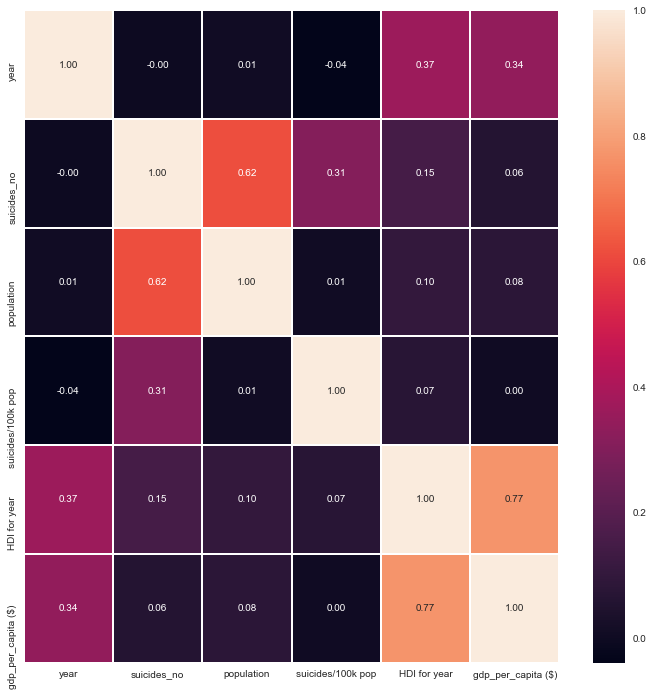

In [11]:
#Generating the correlation map with the help of seaborn's heatmap
f,ax = plt.subplots(figsize = (12,12))
sns.heatmap(data[['year','suicides_no','population','suicides/100k pop','HDI for year','gdp_per_capita ($)']].corr(), annot=True, linewidths = 1, fmt = '.2f',ax = ax) #using the seaborn and heatmap
plt.show() #matplotlib.pyplot library

Suicdes_no variable is more correlated with population variable.

### Step 11 - Histograms

Create histograms of the features to understand the distribution and skewness of the data.

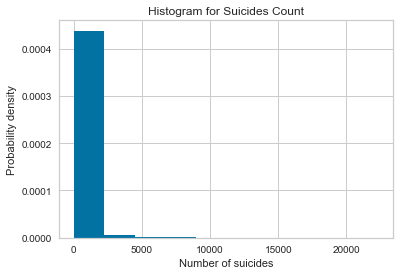

In [12]:
# Step 11: Histograms of the variables
fig, ax = plt.subplots()
n, bins, patches = ax.hist(data['suicides_no'], 10, density=1)
ax.set_xlabel('Number of suicides')
ax.set_ylabel('Probability density')
ax.set_title('Histogram for Suicides Count')
plt.show()

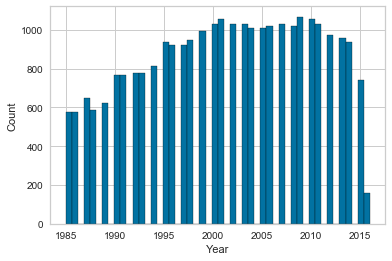

In [13]:
#Histogram for Year 
plt.hist(data['year'], edgecolor = 'black',bins = 50)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

### Step 12 - Scatter Plot

Scatter plot: I want to see how number of suicides and population metrics show up on scatter plot

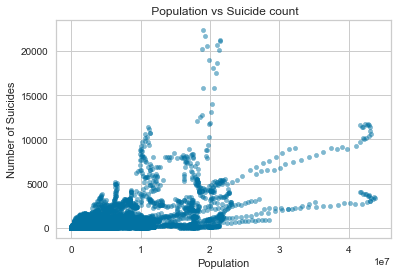

In [14]:
#Scatter plot for Suicide count vs population
#x = population and y = suicide number
data.plot(kind = 'scatter', x = 'population', y = 'suicides_no', alpha = 0.5, color = 'b' )
plt.xlabel('Population')
plt.ylabel('Number of Suicides')
plt.title(' Population vs Suicide count')
plt.show()

## Part 2 

### Step 13 - Binary classification for suicide risk


I want to perform a binary classification on the suicide data, by assigning risk classes based on the suicide incidences per 100k of the population as high/low suicide risk. Adding an extra column to the "total" data frame as 'risk'.  

Suicides<mean(Suicides) --> 'low risk' --> class 0  
Suicides>mean(Suicides) --> 'high risk' --> class 1  


In [15]:
data['suicides/100k pop'].mean()

12.816097411933894

In [16]:
import numpy as np
data['suicide_risk']=np.where(data['suicides/100k pop']<data['suicides/100k pop'].mean(),0,1)

In [17]:
#data[data['suicide_risk']==1].head(), data[data['suicide_risk']==0].head()
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,suicide_risk
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,0
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,0
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,0
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,0
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,0


### Step 14 - Filling in missing values


I could have completed this task last week itself, but I did it this time. ‘HDI for year’ had lot of NaN values.

In [18]:
# There are multiple techniques to replace Null values, I'm choosing meadian() to fill them up.
# fill the missing data with median value
def fill_na_median(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)

fill_na_median(data['HDI for year'])

# check the result
data['HDI for year'].describe()


count    27820.000000
mean         0.778279
std          0.051204
min          0.483000
25%          0.779000
50%          0.779000
75%          0.779000
max          0.944000
Name: HDI for year, dtype: float64

In [19]:
#Make sure there are no more missing values in the dataset
data.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
suicide_risk          0
dtype: int64

### Step 15- Handling Categorical data - One hot encoding

As you know, most of the machine learning algorithms expect data in numerical format. So, I used one-hot encoding to convert categorical data to numeric.

In [20]:
# get the categorical data
cat_features = ['country', 'sex', 'age', 'generation']
data_cat = data[cat_features]
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)
# check the data
data_cat_dummies.head()

,country_Albania,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,...,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


As you can see the number of columns exploded to 115.

### Step 16 - Combining new dummy categorical data and numerical data into one 

I combined one-hot encoded categorical data and numerical data into one dataframe.

In [21]:
# create a whole features dataset that can be used for train and validation data splitting
# lets combine the numerical features and the dummie features together
num_features = ['year','suicides_no','population','suicides/100k pop','gdp_per_capita ($)', 'suicide_risk']
data_model_X = pd.concat([data[num_features],data_cat_dummies], axis = 1)

# check the data
data_model_X.head()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($),suicide_risk,country_Albania,country_Antigua and Barbuda,country_Argentina,country_Armenia,...,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,1987,21,312900,6.71,796,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1987,16,308000,5.19,796,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1987,14,289700,4.83,796,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1987,1,21800,4.59,796,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,1987,9,274300,3.28,796,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [22]:
# create a whole target dataset that can be used for train and validation data splitting
data_model_y = data.replace({'suicide_risk': {1: 'High_Risk', 0: 'Low_Risk'}})['suicide_risk']

# check the data
data_model_y.head()

0    Low_Risk
1    Low_Risk
2    Low_Risk
3    Low_Risk
4    Low_Risk
Name: suicide_risk, dtype: object

### Step 17 - Create training and test datasets

I have split the datasets into two parts. One for training the model and another one for testing the model.

In [23]:
# seperate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Survived and not-survived
print('\n')
print('No. of low_risk and high_risk in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of low_risk and high_risk in the validation set:')
print(y_val.value_counts())


No. of samples in training set:  19474
No. of samples in validation set: 8346


No. of low_risk and high_risk in the training set:
Low_Risk     13335
High_Risk     6139
Name: suicide_risk, dtype: int64


No. of low_risk and high_risk in the validation set:
Low_Risk     5726
High_Risk    2620
Name: suicide_risk, dtype: int64


### Step 18 - PCA as dimensionality reduction


PCA for dimensionality reduction involves removing one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves maximum data variance

In [24]:
#Importing PCA from sklearn module
from sklearn.decomposition import PCA
X=data_model_X

#Setting number of components to 2
pca = PCA(n_components=1)
pca.fit(X)
X_pca = np.array(pca.transform(X))
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (27820, 121)
transformed shape: (27820, 1)


The fit learns some quantities from the data, most importantly the "components" and "explained variance".

In [25]:
print(pca.components_)

[[ 1.91621268e-08  1.42085689e-04  9.99999912e-01  4.01596827e-08
   3.93570044e-04  1.64840039e-09 -9.97685281e-10 -1.39944087e-09
   8.21544762e-10 -1.10974057e-09 -7.25098953e-10 -2.85998105e-10
  -1.08261587e-09 -5.69459019e-10 -1.18069161e-09 -1.05273123e-09
  -1.28551024e-09 -6.28436072e-10 -8.99624413e-10 -1.44134871e-09
  -8.67954184e-11  9.79552850e-09 -1.01527100e-09 -5.09421405e-11
   4.32397382e-10 -6.07581477e-10  9.90579573e-10 -1.32010288e-09
  -9.19939509e-10 -6.56613607e-10 -7.44126740e-10 -7.75023924e-10
  -8.80553004e-10 -5.18484202e-11 -8.03259824e-10 -9.55205424e-10
  -1.02844995e-09 -5.52814780e-10 -1.17471294e-09  2.36472636e-09
  -9.24219708e-10  3.40461985e-09 -8.69575868e-10 -1.33793162e-09
  -8.42802289e-10 -1.26112695e-09 -7.59343624e-10 -1.63570878e-09
  -1.30400885e-09 -1.20555849e-09  2.41675692e-09 -7.91326039e-10
   7.03513344e-09 -4.65278880e-10 -5.70306372e-10 -1.16594318e-09
  -1.08155395e-09 -9.86725412e-10 -9.75485609e-10 -1.58168452e-09
  -5.11901

In [26]:
# Explained variance
print(pca.explained_variance_)

[1.53020211e+13]


The transformed data has been reduced to a single dimension. To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:



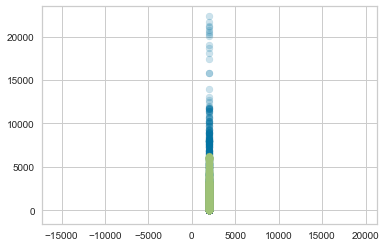

In [27]:
#Lets visualize the effect of dimensionality reduction
X1 = np.array(X)
X_new = pca.inverse_transform(X_pca)
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

## Part 3 - Modeling and evaluation

### Step 19 Logistic regression and confusion matrix

Since its a binary classification problem, I want to try Logistic regression model first and see how it predicts the target values.

C:\Users\siris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


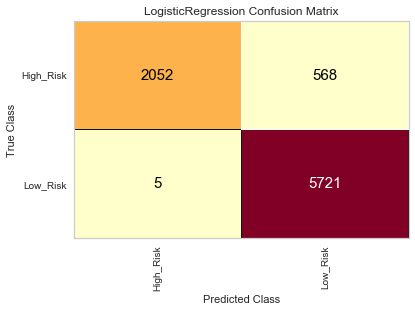

In [28]:
# import packages
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

%matplotlib inline
# Instantiate the classification model 
model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
classes = ['High_Risk','Low_Risk']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(15)

cm.poof()

From the above confusion matrix, the accuracy of the model is (2052+5721) / (2052+5721+5+568) = **93.13%**  
This accuracy is much more than random guess (50%). Hence, Logistic regression model fits the dataset very well.  



### Step 20 -  Precision, recall and F1 score


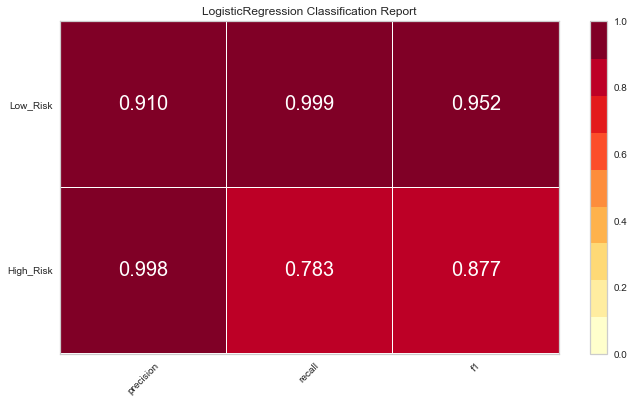

In [29]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

The precision, recall, and F1 score result further confirmed that the model is relatively good.



### Step 21 - ROC curve and AUC


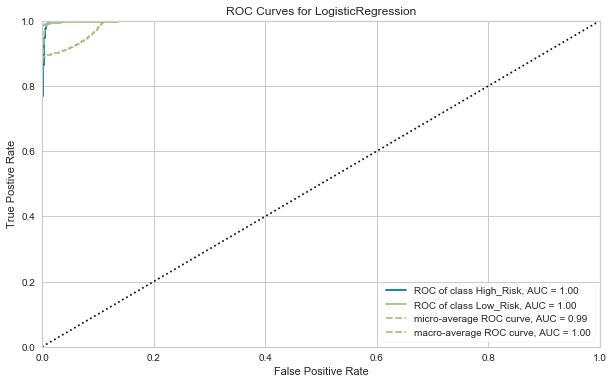

In [30]:
# Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

As per ROC Curve, the model fits well. The diagnol dotted line depicts the random guesses. Since all of our predictions are above that line, our model is much better than a random guess.  

### End of Project ###